# Fonte dos dados:
 - $IEX = \frac{VTE}{VTD}$
 - VTE (Valor Total Executado): Sistema de Gestão Financeira do Fundo Nacional de Desenvolvimento da Educação (SIGEF/PDDE/FNDE/MEC).
 - VTD (Valor Total Repassado Durante o Período ): Sistema de Ações Educacionais do PDDE do Fundo Nacional de Desenvolvimento da Educação (SAE/PDDE/FNDE/MEC).
 - Dados de estrutura escolar: Censo Escolar da Educação Básica (INEP/MEC). Disponíveis em: http://inep.gov.br/web/guest/resultados-e-resumos.
 - PIB per capita, população: IBGE.
 - Dados das Agências Bancárias: BACEN.


# Carregando os dados

In [316]:
%%capture
!pip install tpot

In [317]:
import pandas as pd
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [318]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [319]:
data = pd.read_csv('drive/MyDrive/merge_iex_censo_meso2015-2021.csv')

#data = pd.read_csv('/home/freitas/Downloads/internet2/data/merge_iex_censo_meso2015-2021.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)
data.drop_duplicates(inplace=True)



In [320]:
data.columns

Index(['CNPJ', 'ANO', 'IEX', 'CO_ESCOLA', 'SG_UF', 'CO_MUNICIPIO',
       'TP_SITUACAO_FUNCIONAMENTO', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO',
       'IN_LOCAL_FUNC_GALPAO', 'IN_PREDIO_COMPARTILHADO',
       'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA',
       'IN_LIXO_SERVICO_COLETA', 'IN_ALMOXARIFADO', 'IN_AUDITORIO',
       'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA',
       'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
       'IN_QUADRA_ESPORTES', 'IN_SALA_DIRETORIA', 'IN_SECRETARIA',
       'IN_COMPUTADOR', 'IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA',
       'IN_INTERNET', 'IN_REGULAR', 'IN_EJA', 'possui_agencia_BB', 'POP',
       'Escola', 'Município', 'lat', 'lon', 'MESO_REGIAO', 'PIB_per_capita'],
      dtype='object')

In [321]:
data = data.drop(columns=['CNPJ','CO_MUNICIPIO','TP_SITUACAO_FUNCIONAMENTO','TP_DEPENDENCIA'])
data

ANO        IEX  CO_ESCOLA SG_UF  TP_LOCALIZACAO  \
0       2015   2.957329   12004898    AC               2   
1       2015   2.957329   12022373    AC               2   
2       2015   2.957329   12031356    AC               2   
3       2015   2.957329   12027480    AC               2   
4       2015   2.957329   12028819    AC               2   
...      ...        ...        ...   ...             ...   
854610  2021   9.785132   43004040    RS               1   
854611  2021   9.889496   43004555    RS               1   
854612  2021   9.939361   43201954    RS               1   
854613  2021  10.000000   43314074    RS               2   
854614  2021   8.985692   43007260    RS               1   

        IN_LOCAL_FUNC_GALPAO  IN_PREDIO_COMPARTILHADO  IN_AGUA_REDE_PUBLICA  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          1                        1                     0   
3                          0                        0                     0   
4                          0                        0                     0   
...                      ...                      ...                   ...   
854610                     0                        1                     1   
854611                     0                        0                     1   
854612                     0                        0                     1   
854613                     0                        0                     1   
854614                     0                        0                     1   

        IN_ENERGIA_REDE_PUBLICA  IN_LIXO_SERVICO_COLETA  ...  IN_REGULAR  \
0                             1                       0  ...           1   
1                             0                       0  ...           1   
2                             0                       0  ...           1   
3                             0                       0  ...           1   
4                             0                       0  ...           1   
...                         ...                     ...  ...         ...   
854610                        1                       1  ...           1   
854611                        1                       1  ...           1   
854612                        1                       1  ...           1   
854613                        1                       1  ...           1   
854614                        1                       1  ...           1   

        IN_EJA  possui_agencia_BB     POP  \
0            0                  1   32385   
1            0                  1   32385   
2            0                  1   17173   
3            0                  1   41750   
4            0                  1  370550   
...        ...                ...     ...   
854610       0                  1  126866   
854611       0                  0    2092   
854612       0                  0    4865   
854613       0                  0    5738   
854614       0                  0    4700   

                                                   Escola  \
0                             ESC INDIGENA TEYU SHANENAWA   
1                            ESC INDIGENA IGARAPE DO ANJO   
2               ESC INDIGENA MARIA LUCIA DA COSTA MOREIRA   
3                                            ESC RECIFE I   
4                                      ESC CANTO DO SABIA   
...                                                   ...   
854610  EMEI DO COMPLEXO ESCOLAR MARILIA SANCHOTENE FE...   
854611                              EMEI PRIMEIROS PASSOS   
854612                                     EMEI SONHO MEU   
854613  ESCOLA MUNICIPAL DE EDUCACAO INFANTIL E ENSINO...   
854614    ESCOLA MUNICIPAL DE EDUCACAO INFANTIL VO DANILO   

                    Município        lat        lon  MESO_REGIAO  \
0                       Feijó        NaN        NaN         1202   
1               

In [322]:
#calculate the avarege IEX per CO_ESCOLA
data['IEX_medio'] = data.groupby('CO_ESCOLA')['IEX'].transform('mean')
data


ANO        IEX  CO_ESCOLA SG_UF  TP_LOCALIZACAO  \
0       2015   2.957329   12004898    AC               2   
1       2015   2.957329   12022373    AC               2   
2       2015   2.957329   12031356    AC               2   
3       2015   2.957329   12027480    AC               2   
4       2015   2.957329   12028819    AC               2   
...      ...        ...        ...   ...             ...   
854610  2021   9.785132   43004040    RS               1   
854611  2021   9.889496   43004555    RS               1   
854612  2021   9.939361   43201954    RS               1   
854613  2021  10.000000   43314074    RS               2   
854614  2021   8.985692   43007260    RS               1   

        IN_LOCAL_FUNC_GALPAO  IN_PREDIO_COMPARTILHADO  IN_AGUA_REDE_PUBLICA  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          1                        1                     0   
3                          0                        0                     0   
4                          0                        0                     0   
...                      ...                      ...                   ...   
854610                     0                        1                     1   
854611                     0                        0                     1   
854612                     0                        0                     1   
854613                     0                        0                     1   
854614                     0                        0                     1   

        IN_ENERGIA_REDE_PUBLICA  IN_LIXO_SERVICO_COLETA  ...  IN_EJA  \
0                             1                       0  ...       0   
1                             0                       0  ...       0   
2                             0                       0  ...       0   
3                             0                       0  ...       0   
4                             0                       0  ...       0   
...                         ...                     ...  ...     ...   
854610                        1                       1  ...       0   
854611                        1                       1  ...       0   
854612                        1                       1  ...       0   
854613                        1                       1  ...       0   
854614                        1                       1  ...       0   

        possui_agencia_BB     POP  \
0                       1   32385   
1                       1   32385   
2                       1   17173   
3                       1   41750   
4                       1  370550   
...                   ...     ...   
854610                  1  126866   
854611                  0    2092   
854612                  0    4865   
854613                  0    5738   
854614                  0    4700   

                                                   Escola  \
0                             ESC INDIGENA TEYU SHANENAWA   
1                            ESC INDIGENA IGARAPE DO ANJO   
2               ESC INDIGENA MARIA LUCIA DA COSTA MOREIRA   
3                                            ESC RECIFE I   
4                                      ESC CANTO DO SABIA   
...                                                   ...   
854610  EMEI DO COMPLEXO ESCOLAR MARILIA SANCHOTENE FE...   
854611                              EMEI PRIMEIROS PASSOS   
854612                                     EMEI SONHO MEU   
854613  ESCOLA MUNICIPAL DE EDUCACAO INFANTIL E ENSINO...   
854614    ESCOLA MUNICIPAL DE EDUCACAO INFANTIL VO DANILO   

                    Município        lat        lon  MESO_REGIAO  \
0                       Feijó        NaN        NaN         1202   
1                       Feijó        NaN        NaN         1202   
2                 Mâncio Lima        NaN        NaN         1202   
3                  Rio B

In [323]:
# transform TP_LOCALIZACAO in bynary 1 = URBANA and 2 = RURAL
data['RURAL'] = data['TP_LOCALIZACAO'].apply(lambda x: 1 if x == 2 else 0)
data.drop(columns=['TP_LOCALIZACAO'],inplace=True)
data

ANO        IEX  CO_ESCOLA SG_UF  IN_LOCAL_FUNC_GALPAO  \
0       2015   2.957329   12004898    AC                     0   
1       2015   2.957329   12022373    AC                     0   
2       2015   2.957329   12031356    AC                     1   
3       2015   2.957329   12027480    AC                     0   
4       2015   2.957329   12028819    AC                     0   
...      ...        ...        ...   ...                   ...   
854610  2021   9.785132   43004040    RS                     0   
854611  2021   9.889496   43004555    RS                     0   
854612  2021   9.939361   43201954    RS                     0   
854613  2021  10.000000   43314074    RS                     0   
854614  2021   8.985692   43007260    RS                     0   

        IN_PREDIO_COMPARTILHADO  IN_AGUA_REDE_PUBLICA  \
0                             0                     0   
1                             0                     0   
2                             1                     0   
3                             0                     0   
4                             0                     0   
...                         ...                   ...   
854610                        1                     1   
854611                        0                     1   
854612                        0                     1   
854613                        0                     1   
854614                        0                     1   

        IN_ENERGIA_REDE_PUBLICA  IN_LIXO_SERVICO_COLETA  IN_ALMOXARIFADO  ...  \
0                             1                       0                0  ...   
1                             0                       0                0  ...   
2                             0                       0                0  ...   
3                             0                       0                0  ...   
4                             0                       0                0  ...   
...                         ...                     ...              ...  ...   
854610                        1                       1                1  ...   
854611                        1                       1                1  ...   
854612                        1                       1                1  ...   
854613                        1                       1                1  ...   
854614                        1                       1                1  ...   

        possui_agencia_BB     POP  \
0                       1   32385   
1                       1   32385   
2                       1   17173   
3                       1   41750   
4                       1  370550   
...                   ...     ...   
854610                  1  126866   
854611                  0    2092   
854612                  0    4865   
854613                  0    5738   
854614                  0    4700   

                                                   Escola  \
0                             ESC INDIGENA TEYU SHANENAWA   
1                            ESC INDIGENA IGARAPE DO ANJO   
2               ESC INDIGENA MARIA LUCIA DA COSTA MOREIRA   
3                                            ESC RECIFE I   
4                                      ESC CANTO DO SABIA   
...                                                   ...   
854610  EMEI DO COMPLEXO ESCOLAR MARILIA SANCHOTENE FE...   
854611                              EMEI PRIMEIROS PASSOS   
854612                                     EMEI SONHO MEU   
854613  ESCOLA MUNICIPAL DE EDUCACAO INFANTIL E ENSINO...   
854614    ESCOLA MUNICIPAL DE EDUCACAO INFANTIL VO DANILO   

                    Município        lat        lon  MESO_REGIAO  \
0                       Feijó        NaN        NaN         1202   
1                       Feijó        NaN        NaN         1202   
2                 Mâncio Lima        NaN        NaN         1202   
3                  Rio Branco        NaN        NaN         1201   
4                  Rio Branco        NaN

In [324]:
bin_labels_IEX = [1, 2, 3, 4]
data['IEX_medio_cat'] = pd.cut(x=data['IEX_medio'] , bins=[-0.1, 4.867289,6.354591, 7.752417, 10.1], labels = bin_labels_IEX)
data['IEX_medio_cat'] = data['IEX_medio_cat'].astype('category')
data

ANO        IEX  CO_ESCOLA SG_UF  IN_LOCAL_FUNC_GALPAO  \
0       2015   2.957329   12004898    AC                     0   
1       2015   2.957329   12022373    AC                     0   
2       2015   2.957329   12031356    AC                     1   
3       2015   2.957329   12027480    AC                     0   
4       2015   2.957329   12028819    AC                     0   
...      ...        ...        ...   ...                   ...   
854610  2021   9.785132   43004040    RS                     0   
854611  2021   9.889496   43004555    RS                     0   
854612  2021   9.939361   43201954    RS                     0   
854613  2021  10.000000   43314074    RS                     0   
854614  2021   8.985692   43007260    RS                     0   

        IN_PREDIO_COMPARTILHADO  IN_AGUA_REDE_PUBLICA  \
0                             0                     0   
1                             0                     0   
2                             1                     0   
3                             0                     0   
4                             0                     0   
...                         ...                   ...   
854610                        1                     1   
854611                        0                     1   
854612                        0                     1   
854613                        0                     1   
854614                        0                     1   

        IN_ENERGIA_REDE_PUBLICA  IN_LIXO_SERVICO_COLETA  IN_ALMOXARIFADO  ...  \
0                             1                       0                0  ...   
1                             0                       0                0  ...   
2                             0                       0                0  ...   
3                             0                       0                0  ...   
4                             0                       0                0  ...   
...                         ...                     ...              ...  ...   
854610                        1                       1                1  ...   
854611                        1                       1                1  ...   
854612                        1                       1                1  ...   
854613                        1                       1                1  ...   
854614                        1                       1                1  ...   

           POP                                             Escola  \
0        32385                        ESC INDIGENA TEYU SHANENAWA   
1        32385                       ESC INDIGENA IGARAPE DO ANJO   
2        17173          ESC INDIGENA MARIA LUCIA DA COSTA MOREIRA   
3        41750                                       ESC RECIFE I   
4       370550                                 ESC CANTO DO SABIA   
...        ...                                                ...   
854610  126866  EMEI DO COMPLEXO ESCOLAR MARILIA SANCHOTENE FE...   
854611    2092                              EMEI PRIMEIROS PASSOS   
854612    4865                                     EMEI SONHO MEU   
854613    5738  ESCOLA MUNICIPAL DE EDUCACAO INFANTIL E ENSINO...   
854614    4700    ESCOLA MUNICIPAL DE EDUCACAO INFANTIL VO DANILO   

                    Município        lat        lon  MESO_REGIAO  \
0                       Feijó        NaN        NaN         1202   
1                       Feijó        NaN        NaN         1202   
2                 Mâncio Lima        NaN        NaN         1202   
3                  Rio Branco        NaN        NaN         1201   
4                  Rio Branco        NaN        NaN         1201   
...                       ...        ...        ...          ...   
854610             Uruguaiana -29.777030 -57.104950         4304   
854611  Boa Vista das Missões        NaN        NaN         4306   
854612  São José do Hortêncio -29.524951 -51.246483         4301   
854613            Picada Café -29.478543 -51.1602

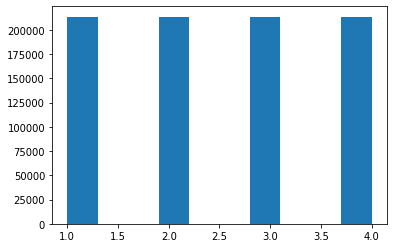

In [325]:
plt.hist(data['IEX_medio_cat']);

In [326]:
data.describe()

ANO            IEX     CO_ESCOLA  IN_LOCAL_FUNC_GALPAO  \
count  854615.000000  854615.000000  8.546150e+05         854615.000000   
mean     2018.057986       6.154729  3.011057e+07              0.019174   
std         1.995465       3.743997  9.889596e+06              0.137135   
min      2015.000000       0.000000  1.100002e+07              0.000000   
25%      2016.000000       3.304293  2.305862e+07              0.000000   
50%      2018.000000       6.814173  2.944892e+07              0.000000   
75%      2020.000000       9.903546  3.526736e+07              0.000000   
max      2021.000000      10.000000  5.306824e+07              1.000000   

       IN_PREDIO_COMPARTILHADO  IN_AGUA_REDE_PUBLICA  IN_ENERGIA_REDE_PUBLICA  \
count            854615.000000         854615.000000            854615.000000   
mean                  0.059571              0.701599                 0.956171   
std                   0.236690              0.457557                 0.204715   
min                   0.000000              0.000000                 0.000000   
25%                   0.000000              0.000000                 1.000000   
50%                   0.000000              1.000000                 1.000000   
75%                   0.000000              1.000000                 1.000000   
max                   1.000000              1.000000                 1.000000   

       IN_LIXO_SERVICO_COLETA  IN_ALMOXARIFADO   IN_AUDITORIO  ...  \
count           854615.000000    854615.000000  854615.000000  ...   
mean                 0.742113         0.419019       0.087940  ...   
std                  0.437472         0.493399       0.283208  ...   
min                  0.000000         0.000000       0.000000  ...   
25%                  0.000000         0.000000       0.000000  ...   
50%                  1.000000         0.000000       0.000000  ...   
75%                  1.000000         1.000000       0.000000  ...   
max                  1.000000         1.000000       1.000000  ...   

          IN_REGULAR         IN_EJA  possui_agencia_BB           POP  \
count  854615.000000  854615.000000      854615.000000  8.546150e+05   
mean        0.988849       0.211649           0.750021  5.432806e+05   
std         0.105009       0.408477           0.433001  1.927219e+06   
min         0.000000       0.000000           0.000000  7.760000e+02   
25%         1.000000       0.000000           1.000000  1.787400e+04   
50%         1.000000       0.000000           1.000000  4.233300e+04   
75%         1.000000       0.000000           1.000000  1.599230e+05   
max         1.000000       1.000000           1.000000  1.232523e+07   

                 lat            lon    MESO_REGIAO  PIB_per_capita  \
count  738424.000000  738424.000000  854615.000000   853895.000000   
mean      -15.031637     -45.738179    2999.777354       15.727938   
std         8.836306       6.263409     989.299560       15.482505   
min       -33.690530     -73.005554    1101.000000        2.507654   
25%       -22.915592     -49.312987    2301.000000        5.968197   
50%       -16.171219     -45.977619    2910.000000       11.582841   
75%        -6.581008     -41.183016    3507.000000       21.065779   
max         4.789615     -32.409753    5301.000000      270.721694   

           IEX_medio          RURAL  
count  854615.000000  854615.000000  
mean        6.154729       0.378930  
std         2.122495       0.485121  
min         0.000000       0.000000  
25%         4.867289       0.000000  
50%         6.354591       0.000000  
75%         7.752417       1.000000  
max        10.000000       1.000000  

[8 rows x 31 columns]

In [327]:
data['SG_UF'] = data['SG_UF'].astype('category')
data['MESO_REGIAO'] = data['MESO_REGIAO'].astype('category')
data.columns


Index(['ANO', 'IEX', 'CO_ESCOLA', 'SG_UF', 'IN_LOCAL_FUNC_GALPAO',
       'IN_PREDIO_COMPARTILHADO', 'IN_AGUA_REDE_PUBLICA',
       'IN_ENERGIA_REDE_PUBLICA', 'IN_LIXO_SERVICO_COLETA', 'IN_ALMOXARIFADO',
       'IN_AUDITORIO', 'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA',
       'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
       'IN_QUADRA_ESPORTES', 'IN_SALA_DIRETORIA', 'IN_SECRETARIA',
       'IN_COMPUTADOR', 'IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA',
       'IN_INTERNET', 'IN_REGULAR', 'IN_EJA', 'possui_agencia_BB', 'POP',
       'Escola', 'Município', 'lat', 'lon', 'MESO_REGIAO', 'PIB_per_capita',
       'IEX_medio', 'RURAL', 'IEX_medio_cat'],
      dtype='object')

In [328]:
data.drop(columns= ['IEX','Escola', 'Município', 'lat', 'lon','IEX_medio'],inplace = True)
data.dropna(inplace=True)
data

ANO  CO_ESCOLA SG_UF  IN_LOCAL_FUNC_GALPAO  IN_PREDIO_COMPARTILHADO  \
0       2015   12004898    AC                     0                        0   
1       2015   12022373    AC                     0                        0   
2       2015   12031356    AC                     1                        1   
3       2015   12027480    AC                     0                        0   
4       2015   12028819    AC                     0                        0   
...      ...        ...   ...                   ...                      ...   
854610  2021   43004040    RS                     0                        1   
854611  2021   43004555    RS                     0                        0   
854612  2021   43201954    RS                     0                        0   
854613  2021   43314074    RS                     0                        0   
854614  2021   43007260    RS                     0                        0   

        IN_AGUA_REDE_PUBLICA  IN_ENERGIA_REDE_PUBLICA  IN_LIXO_SERVICO_COLETA  \
0                          0                        1                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        0                       0   
4                          0                        0                       0   
...                      ...                      ...                     ...   
854610                     1                        1                       1   
854611                     1                        1                       1   
854612                     1                        1                       1   
854613                     1                        1                       1   
854614                     1                        1                       1   

        IN_ALMOXARIFADO  IN_AUDITORIO  ...  IN_EQUIP_IMPRESSORA  IN_INTERNET  \
0                     0             0  ...                    0            0   
1                     0             0  ...                    0            0   
2                     0             0  ...                    0            0   
3                     0             0  ...                    0            0   
4                     0             0  ...                    0            0   
...                 ...           ...  ...                  ...          ...   
854610                1             0  ...                    1            1   
854611                1             0  ...                    0            1   
854612                1             1  ...                    1            1   
854613                1             0  ...                    0            1   
854614                1             0  ...                    1            1   

        IN_REGULAR  IN_EJA  possui_agencia_BB     POP  MESO_REGIAO  \
0                1       0                  1   32385         1202   
1                1       0                  1   32385         1202   
2                1       0                  1   17173         1202   
3                1       0                  1   41750         1201   
4                1       0                  1  370550         1201   
...            ...     ...                ...     ...          ...   
854610           1       0                  1  126866         4304   
854611           1       0                  0    2092         4306   
854612           1       0                  0    4865         4301   
854613           1       0                  0    5738         4307   
854614           1       0                  0    4700         4306   

        PIB_per_capita  RURAL  IEX_medio_cat  
0             6.271941      1              1  
1             6.271941      1              1  
2             6.820475      1              1  
3             7.362856      1              1  
4            14.040773      1         

In [329]:
data.query('ANO == 2021',inplace=True)
data.drop(columns=['ANO'],inplace=True)


In [330]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['IEX_medio_cat'])
y = data['IEX_medio_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data_train2 = X_train.copy()
data_test = X_test.copy()
data_test2 = X.copy()
X_test.drop(columns=['CO_ESCOLA'],inplace=True)
X_train.drop(columns=['CO_ESCOLA'],inplace=True)


# Pre-processing

In [331]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [332]:
# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder

# let's create the encoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=False)  # to return k-1, false to return k

In [333]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(X_train)

OneHotEncoder()

In [334]:
# we can see which variables the encoder will encode

ohe_enc.variables

In [335]:
# let's transform train and test set

X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [336]:
# let's inspect the encoded train set

X_train

IN_LOCAL_FUNC_GALPAO  IN_PREDIO_COMPARTILHADO  IN_AGUA_REDE_PUBLICA  \
765476                     0                        0                     1   
750686                     0                        0                     0   
746977                     0                        0                     1   
824765                     0                        0                     1   
777237                     0                        0                     1   
...                      ...                      ...                   ...   
848449                     0                        0                     0   
832244                     0                        0                     0   
729325                     0                        0                     0   
744260                     0                        0                     1   
850529                     0                        0                     1   

        IN_ENERGIA_REDE_PUBLICA  IN_LIXO_SERVICO_COLETA  IN_ALMOXARIFADO  \
765476                        1                       0                0   
750686                        1                       0                0   
746977                        1                       1                0   
824765                        1                       0                0   
777237                        1                       1                1   
...                         ...                     ...              ...   
848449                        1                       1                0   
832244                        0                       0                0   
729325                        1                       0                1   
744260                        1                       1                0   
850529                        1                       1                1   

        IN_AUDITORIO  IN_BIBLIOTECA  IN_BIBLIOTECA_SALA_LEITURA  \
765476             0              0                           0   
750686             0              0                           0   
746977             0              0                           0   
824765             0              0                           0   
777237             1              1                           1   
...              ...            ...                         ...   
848449             0              0                           0   
832244             0              0                           0   
729325             0              1                           1   
744260             0              0                           1   
850529             0              0                           0   

        IN_LABORATORIO_CIENCIAS  ...  MESO_REGIAO_1402  MESO_REGIAO_3107  \
765476                        0  ...                 0                 0   
750686                        0  ...                 0                 0   
746977                        0  ...                 0                 0   
824765                        0  ...                 0                 0   
777237                        1  ...                 0                 0   
...                         ...  ...               ...               ...   
848449                        0  ...                 0                 0   
832244                        0  ...                 0                 0   
729325                        0  ...                 0                 0   
744260                        0  ...                 0                 0   
850529                        0  ...                 0                 0   

        MESO_REGIAO_4302  MESO_REGIAO_1703  MESO_REGIAO_4102  \
765476                 0                 0                 0   
750686                 0                 0                 0   
746977                 0                 0                 0   
824765                 0                 0                 0   
777237                 0                 0                 0   
...                  ...               ...  

In [337]:
X_train.shape

(100835, 184)

In [338]:
# set up the scaler
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='box-cox', standardize=True)
transformer2 = PowerTransformer(method='box-cox', standardize=True)

# fit the scaler to the train set, it will learn the parameters
transformer.fit(X_train[['POP']])
transformer2.fit(X_train[['PIB_per_capita']])

# transform train and test sets
X_train['POP'] = transformer.transform(X_train[['POP']])
X_test['POP'] = transformer.transform(X_test[['POP']])
X_train['PIB_per_capita'] = transformer2.transform(X_train[['PIB_per_capita']])
X_test['PIB_per_capita'] = transformer2.transform(X_test[['PIB_per_capita']])

In [339]:
# # set up the scaler
# scaler = MinMaxScaler()
# scaler2 = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(X_train[['POP']])
# scaler2.fit(X_train[['PIB_per_capita']])

# # transform train and test sets
# X_train['POP'] = scaler.transform(X_train[['POP']])
# X_test['POP'] = scaler.transform(X_test[['POP']])
# X_train['PIB_per_capita'] = scaler2.transform(X_train[['PIB_per_capita']])
# X_test['PIB_per_capita'] = scaler2.transform(X_test[['PIB_per_capita']])

# *Catboost*

In [340]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [341]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import catboost
print('catboost version:', catboost.__version__)
from catboost import CatBoostClassifier 
# titanic_df = titanic

catboost version: 1.1.1


In [342]:
# map categorical features
# titanic_catboost_ready_df = titanic_df.dropna() 

# features = [feat for feat in list(titanic_catboost_ready_df) 
            # if feat != 'survived']
# print(features)
# categorical_features = np.where(titanic_catboost_ready_df[features].dtypes != np.float)[0]
 

# X_train, X_test, y_train, y_test = train_test_split(titanic_df[features], 

params = {'iterations':12000,
        'learning_rate':0.01,
        'depth':8,
        'eval_metric':'AUC',
        'verbose':1000,
        'od_type':"Iter", 
        'od_wait':500, 
        'random_seed': 1
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, 
          plot=True  
         );
 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6169124	best: 0.6169124 (0)	total: 150ms	remaining: 29m 55s
1000:	test: 0.7061709	best: 0.7061709 (1000)	total: 2m	remaining: 22m 9s
2000:	test: 0.7290084	best: 0.7290084 (2000)	total: 4m 10s	remaining: 20m 52s
3000:	test: 0.7404477	best: 0.7404481 (2999)	total: 6m 30s	remaining: 19m 31s
4000:	test: 0.7475627	best: 0.7475627 (4000)	total: 9m 3s	remaining: 18m 6s
5000:	test: 0.7519763	best: 0.7519764 (4998)	total: 11m 44s	remaining: 16m 25s
6000:	test: 0.7550454	best: 0.7550454 (6000)	total: 14m 34s	remaining: 14m 34s
7000:	test: 0.7573062	best: 0.7573062 (7000)	total: 17m 36s	remaining: 12m 34s
8000:	test: 0.7590761	best: 0.7590761 (8000)	total: 20m 45s	remaining: 10m 22s
9000:	test: 0.7602523	best: 0.7602536 (8999)	total: 24m 7s	remaining: 8m 2s
10000:	test: 0.7612820	best: 0.7612850 (9992)	total: 27m 41s	remaining: 5m 32s
11000:	test: 0.7619928	best: 0.7620016 (10965)	total: 32m 23s	remaining: 2m 56s
11999:	test: 0.7625796	best: 0.7625959 (11952)	total: 36m 17s	remaining: 

accuracy_score: 0.4635249315720576


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


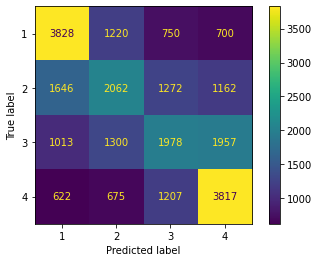

In [356]:
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, plot_confusion_matrix, roc_auc_score
print('accuracy_score:', accuracy_score(y_test,y_pred_catbost))
#print('roc_auc_score:',roc_auc_score(y_test,y_pred_catbost,multi_class='ovr'))
plot_confusion_matrix(cat_model,X_test,y_test)


# Tabelas (em construção)

In [353]:
# Table to send to streamlit
y_pred_catbost = cat_model.predict(X_test)
data_test['IEX_medio_pred'] = y_pred_catbost
data_test

CO_ESCOLA  IEX_medio_pred IEX_medio
0       23103531               2       NaN
1       23027606               4       NaN
2       26089491               2       NaN
3       31068373               2       NaN
4       12015776               2       NaN
...          ...             ...       ...
25204   26130149               4       NaN
25205   29330670               4       NaN
25206   35288421               1       NaN
25207   22087877               4       NaN
25208   29335639               2       NaN

[25209 rows x 3 columns]

In [344]:
data_test.to_csv('dataset_to_present(25000_linhas)')

In [345]:
data_test = pd.read_csv('dataset_to_present(25000_linhas)')
data_test = data_test[['CO_ESCOLA','IEX_medio_pred']]
data_test

CO_ESCOLA  IEX_medio_pred
0       23103531               2
1       23027606               4
2       26089491               2
3       31068373               2
4       12015776               2
...          ...             ...
25204   26130149               4
25205   29330670               4
25206   35288421               1
25207   22087877               4
25208   29335639               2

[25209 rows x 2 columns]

In [346]:
data_train2['IEX_medio_pred'] = y_train
data_train2 = data_train2[['CO_ESCOLA','IEX_medio_pred']]
data_train2

CO_ESCOLA IEX_medio_pred
765476   15049558              1
750686   21215197              2
746977   52085066              4
824765   29131588              3
777237   33001022              2
...           ...            ...
848449   29152380              2
832244   29301270              4
729325   12032107              2
744260   53068190              1
850529   33184542              2

[100835 rows x 2 columns]

In [347]:
data_final = pd.concat([data_test, data_train2])
data_final


CO_ESCOLA  IEX_medio_pred
0        23103531               2
1        23027606               4
2        26089491               2
3        31068373               2
4        12015776               2
...           ...             ...
848449   29152380               2
832244   29301270               4
729325   12032107               2
744260   53068190               1
850529   33184542               2

[126044 rows x 2 columns]

In [348]:
data_final.to_csv('dataset_to_present(126000 linhas)')

In [355]:
# Table to send to streamlit
y_pred_catbost = cat_model.predict(X_test)
data_test['IEX_medio_pred'] = y_pred_catbost
data_test['IEX_medio'] = y_test
data_test

CO_ESCOLA  IEX_medio_pred IEX_medio
0       23103531               2       NaN
1       23027606               4       NaN
2       26089491               2       NaN
3       31068373               2       NaN
4       12015776               2       NaN
...          ...             ...       ...
25204   26130149               4       NaN
25205   29330670               4       NaN
25206   35288421               1       NaN
25207   22087877               4       NaN
25208   29335639               2       NaN

[25209 rows x 3 columns]

In [351]:
from google.colab import output
output.enable_custom_widget_manager()

In [352]:
from google.colab import output
output.disable_custom_widget_manager()